# 02. Limpieza de datos

Este notebook contiene la limpieza del dataset de víctimas del conflicto armado en Colombia.

## Importación de Librerías

Importamos las librerías necesarias para el análisis de datos.

In [1]:
import pandas as pd
import csv
import os
import matplotlib.pyplot as plt
import seaborn as sns

## Carga del Dataset

Cargamos el dataset de víctimas del conflicto armado desde el archivo CSV.

In [2]:
# Define the relative path to the data file
data_path = '../data/raw/victimas_por_hechos_departamental_20250416.csv'

# Load the dataset
try:
    # Attempt to read with UTF-8 encoding first
    df = pd.read_csv(data_path, encoding='utf-8') 
except UnicodeDecodeError:
    try:
        # Fallback to Latin-1 encoding if UTF-8 fails
        df = pd.read_csv(data_path, encoding='latin1') 
    except Exception as e:
        print(f"Error loading CSV file: {e}")
        df = None # Indicate failure by setting df to None

# Verificar si el dataset se cargó correctamente
if df is not None:
    print(f"Dataset cargado exitosamente. Dimensiones: {df.shape}")
else:
    print("Error al cargar el dataset. Por favor, verifica la ruta y la codificación del archivo.")

Dataset cargado exitosamente. Dimensiones: (2431164, 17)


# Eliminacion de columnas innecesarias
Se eliminaran las columnas que no sean necesarias para el analisis como NOM_RPT, COD_PAI y PAIS

In [3]:
# Mostrar forma inicial del dataframe y vista previa
print(f"Forma inicial del dataframe: {df.shape}")
print(f"Columnas del dataframe: {df.columns.tolist()}")

Forma inicial del dataframe: (2431164, 17)
Columnas del dataframe: ['FECHA_CORTE', 'NOM_RPT', 'COD_PAIS', 'PAIS', 'COD_ESTADO_DEPTO', 'ESTADO_DEPTO', 'PARAM_HECHO', 'HECHO', 'SEXO', 'ETNIA', 'DISCAPACIDAD', 'CICLO_VITAL', 'PER_OCU', 'PER_DECLA', 'PER_UBIC', 'PER_SA', 'EVENTOS']


In [4]:
# Columnas que se eliminarán
columns_to_drop = ["NOM_RPT", "COD_PAIS", "PAIS", "FECHA_CORTE"]

# Eliminar columnas especificadas
df = df.drop(columns=columns_to_drop)

In [5]:
# Mostrar forma final del dataframe
print(f"Forma final del dataframe después de eliminar columnas: {df.shape}")
print(f"Columnas del dataframe: {df.columns.tolist()}")
df.head()

Forma final del dataframe después de eliminar columnas: (2431164, 13)
Columnas del dataframe: ['COD_ESTADO_DEPTO', 'ESTADO_DEPTO', 'PARAM_HECHO', 'HECHO', 'SEXO', 'ETNIA', 'DISCAPACIDAD', 'CICLO_VITAL', 'PER_OCU', 'PER_DECLA', 'PER_UBIC', 'PER_SA', 'EVENTOS']


,COD_ESTADO_DEPTO,ESTADO_DEPTO,PARAM_HECHO,HECHO,SEXO,ETNIA,DISCAPACIDAD,CICLO_VITAL,PER_OCU,PER_DECLA,PER_UBIC,PER_SA,EVENTOS
0,13,Bolivar,5,Desplazamiento forzado,Hombre,Gitano (RROM) (Acreditado RA),Ninguna,entre 18 y 28,3.0,4.0,3.0,3.0,3.0
1,20,Cesar,5,Desplazamiento forzado,Mujer,Raizal del Archipielago de San Andres y Provid...,Multiple,entre 61 y 100,1.0,NaN,NaN,NaN,1.0
2,18,Caqueta,5,Desplazamiento forzado,Hombre,Gitano (RROM) (Acreditado RA),Ninguna,entre 29 y 60,2.0,NaN,NaN,NaN,2.0
3,95,Guaviare,5,Desplazamiento forzado,Hombre,Negro(a) o Afrocolombiano(a),Fisica,entre 61 y 100,11.0,7.0,4.0,4.0,12.0
4,18,Caqueta,2,Amenaza,Hombre,Indigena (Acreditado RA),Por Establecer,entre 12 y 17,1.0,1.0,1.0,1.0,1.0


# Corrección de errores de codificación y unificación de categorías

Se identificaron y reemplazaron valores con errores de codificación en varias columnas, con el fin de mejorar la calidad y consistencia de los datos. A continuación, se detallan los ajustes realizados:

### Columna: `ESTADO_DEPTO`

Valores corregidos:

* `"Nari�o"`
* `"NariÃ±o"`

Reemplazados por:

* `"Nariño"`

---

### Columna: `HECHO`

Valores corregidos:

* `"Desaparici�n forzada"`
* `"DesapariciÃ³n forzada"`

Reemplazados por:

* `"Desaparición forzada"`

---

* `"VinculaciÃ³n de NiÃ±os NiÃ±as y Adolescentes a Actividades Relacionadas con grupos armados"`
* `"Vinculaci�n de Ni�os Ni�as y Adolescentes a Actividades Relacionadas con grupos armados"`

Reemplazados por:

* `"Vinculación de Niños Niñas y Adolescentes a Actividades Relacionadas con grupos armados"`

---

* `"Minas Antipersonal, Munici�n sin Explotar y Artefacto Explosivo improvisado"`

Reemplazado por:

* `"Minas Antipersonal, Munición sin Explotar y Artefacto Explosivo improvisado"`

---

### Columna: `ETNIA`

Unificación de categorías para facilitar el análisis:

Valores originales:

* `"Negro (Acreditado RA)"`
* `"Afrocolombiano (Acreditado RA)"`

Reemplazados por:

* `"Negro(a) o Afrocolombiano(a) (Acreditado RA)"`


In [6]:
# Corrección de errores de codificación

df['ESTADO_DEPTO'] = df['ESTADO_DEPTO'].replace({
    'Nari�o': 'Nariño',
    'NariÃ±o': 'Nariño'
})

df['HECHO'] = df['HECHO'].replace({
    'Desaparici�n forzada': 'Desaparición forzada',
    'DesapariciÃ³n forzada': 'Desaparición forzada',
    'VinculaciÃ³n de NiÃ±os NiÃ±as y Adolescentes a Actividades Relacionadas con grupos armados':
        'Vinculación de Niños Niñas y Adolescentes a Actividades Relacionadas con grupos armados',
    'Vinculaci�n de Ni�os Ni�as y Adolescentes a Actividades Relacionadas con grupos armados':
        'Vinculación de Niños Niñas y Adolescentes a Actividades Relacionadas con grupos armados',
    'Minas Antipersonal, Munici�n sin Explotar y Artefacto Explosivo improvisado':
        'Minas Antipersonal, Munición sin Explotar y Artefacto Explosivo improvisado'
})

df['ETNIA'] = df['ETNIA'].replace({
    'Negro (Acreditado RA)': 'Negro(a) o Afrocolombiano(a) (Acreditado RA)',
    'Afrocolombiano (Acreditado RA)': 'Negro(a) o Afrocolombiano(a) (Acreditado RA)'
})

df['CICLO_VITAL'] = df['CICLO_VITAL'].replace({
'entre 61 y 100': 'entre 60 y 110'
})


# Limpieza y Validación de Grupos Únicos para Reemplazo de NaN por Cero

Este análisis tiene como objetivo **justificar y ejecutar** el reemplazo de valores faltantes (`NaN`) por `0` en las variables de conteo:

- `PER_OCU`
- `PER_DECLA`
- `PER_UBIC`
- `PER_SA`
- `EVENTOS`

El procedimiento se realiza **únicamente si se confirma que no existen registros duplicados** por grupo definido a partir de:

- `FECHA_CORTE`
- `HECHO`
- `ESTADO_DEPTO`
- `SEXO`
- `CICLO_VITAL`
- `ETNIA`

De esta forma se garantiza que cada fila representa un grupo único y que los valores nulos pueden interpretarse como **"cero personas/eventos registrados"**.



In [7]:
# Paso 1: Definir columnas
columnas_grupo = ['COD_ESTADO_DEPTO','ESTADO_DEPTO', 'PARAM_HECHO','HECHO', 'SEXO',  'ETNIA', 'DISCAPACIDAD', 'CICLO_VITAL']
variables_conteo = ['PER_OCU', 'PER_DECLA', 'PER_UBIC', 'PER_SA', 'EVENTOS']

In [8]:
# Paso 3: Reemplazar NaN por 0
df[variables_conteo] = df[variables_conteo].fillna(0)

In [9]:
# cambio de tipo float a int en variables de conteo
df[variables_conteo] = df[variables_conteo].astype(int)

df.dtypes

COD_ESTADO_DEPTO     int64
ESTADO_DEPTO        object
PARAM_HECHO          int64
HECHO               object
SEXO                object
ETNIA               object
DISCAPACIDAD        object
CICLO_VITAL         object
PER_OCU              int32
PER_DECLA            int32
PER_UBIC             int32
PER_SA               int32
EVENTOS              int32
dtype: object

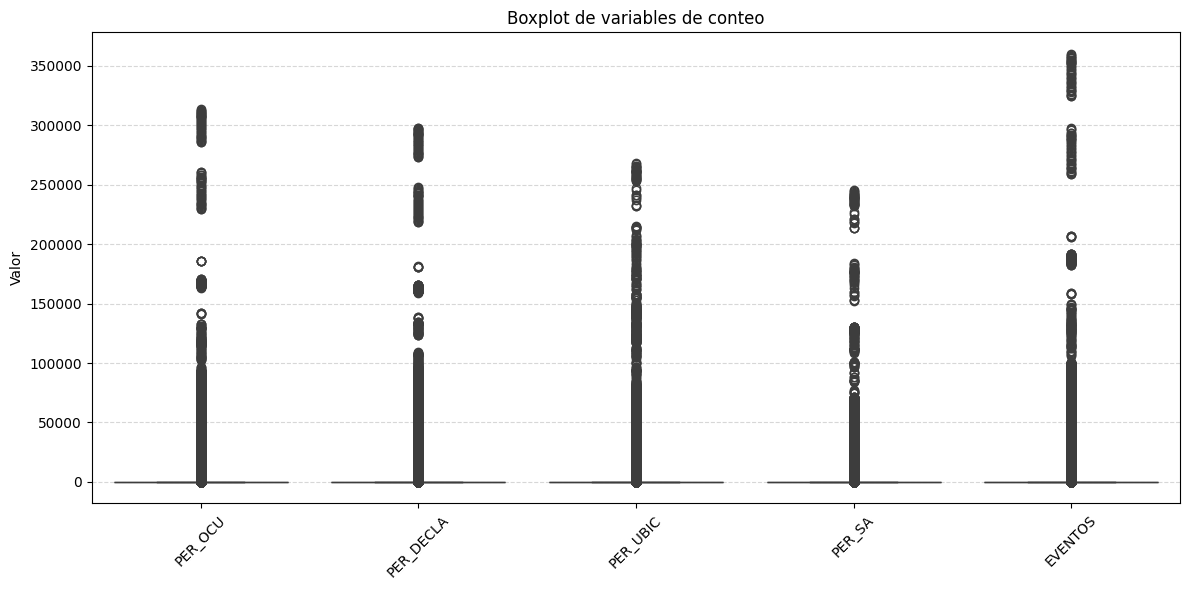

In [27]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[variables_conteo])
plt.title("Boxplot de variables de conteo")
plt.ylabel("Valor")
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [94]:
# Crear un diccionario para almacenar resultados
resumen_conteo = {}

for col in variables_conteo:
    # Frecuencia de cada valor
    vc = df[col].value_counts().sort_index()
    
    # Total de la variable
    total = df[col].sum()
    
    # Guardar ambos en el diccionario
    resumen_conteo[col] = {
        "Frecuencia de valores": vc,
        "Suma total": total
    }

# Mostrar resumen organizado
for col, info in resumen_conteo.items():
    print(f"\n🔢 Variable: {col}")
    print("-" * 40)
    print("📊 Value Counts:")
    print(info["Frecuencia de valores"])
    print(f"\n🧮 Suma total: {info['Suma total']}")



🔢 Variable: PER_OCU
----------------------------------------
📊 Value Counts:
PER_OCU
0         511074
1         637340
2         244960
3         137713
4          92783
           ...  
310767         1
311814         1
311955         1
312541         1
313180         1
Name: count, Length: 15696, dtype: int64

🧮 Suma total: 462326006

🔢 Variable: PER_DECLA
----------------------------------------
📊 Value Counts:
PER_DECLA
0         563604
1         609270
2         235709
3         133486
4          89580
           ...  
295624         1
296607         1
296703         1
297353         1
297993         1
Name: count, Length: 16123, dtype: int64

🧮 Suma total: 471544487

🔢 Variable: PER_UBIC
----------------------------------------
📊 Value Counts:
PER_UBIC
0         456844
1         662339
2         251032
3         143372
4          96633
           ...  
264679         2
265260         1
266059         1
267491         1
268244         1
Name: count, Length: 15756, dtype: int64

🧮

In [96]:
# Previsualización del impacto de los outliers
resumen_outliers = []

for col in variables_conteo:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    total = len(df)
    num_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]

    resumen_outliers.append({
        'Variable': col,
        'Q1': round(Q1, 2),
        'Q3': round(Q3, 2),
        'IQR': round(IQR, 2),
        'Límite inferior': round(lower_bound, 2),
        'Límite superior': round(upper_bound, 2),
        'Outliers detectados': num_outliers,
        'Porcentaje Outliers': round((num_outliers / total) * 100, 2)
    })

resumen_df = pd.DataFrame(resumen_outliers)
display(resumen_df)


,Variable,Q1,Q3,IQR,Límite inferior,Límite superior,Outliers detectados,Porcentaje Outliers
0,PER_OCU,1.0,8.0,7.0,-9.5,18.5,418555,17.22
1,PER_DECLA,1.0,8.0,7.0,-9.5,18.5,418324,17.21
2,PER_UBIC,1.0,9.0,8.0,-11.0,21.0,394495,16.23
3,PER_SA,1.0,7.0,6.0,-8.0,16.0,418080,17.20
4,EVENTOS,1.0,9.0,8.0,-11.0,21.0,406537,16.72


In [97]:
resumen_df.to_csv(
    path_or_buf='../data/processed/resumen_outliers.csv',
    sep=',',
    na_rep='',
    header=True,
    index=False,
    encoding='utf-8',
    quoting=csv.QUOTE_MINIMAL,
    lineterminator=os.linesep,
    quotechar='"',
    decimal='.',
    errors='strict'
)

In [10]:
# Paso 1: Crear una máscara booleana para marcar outliers en cualquier columna
outlier_mask = pd.Series(False, index=df.index)

for col in variables_conteo:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Marcar como True los registros fuera del rango permitido
    outlier_mask |= (df[col] < lower_bound) | (df[col] > upper_bound)

In [11]:
# Paso 2: Guardar los registros eliminados (opcional pero recomendable)
df_outliers = df[outlier_mask].copy()

In [101]:
df_outliers.to_csv(
    path_or_buf='../data/processed/outliers.csv',
    sep=',',
    na_rep='',
    header=True,
    index=False,
    encoding='utf-8',
    quoting=csv.QUOTE_MINIMAL,
    lineterminator=os.linesep,
    quotechar='"',
    decimal='.',
    errors='strict'
)

In [12]:
# Paso 3: Filtrar el DataFrame conservando solo registros válidos
df = df[~outlier_mask].copy()

In [13]:
# Paso 4: Reporte rápido
print(f"Registros eliminados: {outlier_mask.sum()}")
print(f"Registros restantes: {len(df)}")

Registros eliminados: 510920
Registros restantes: 1920244


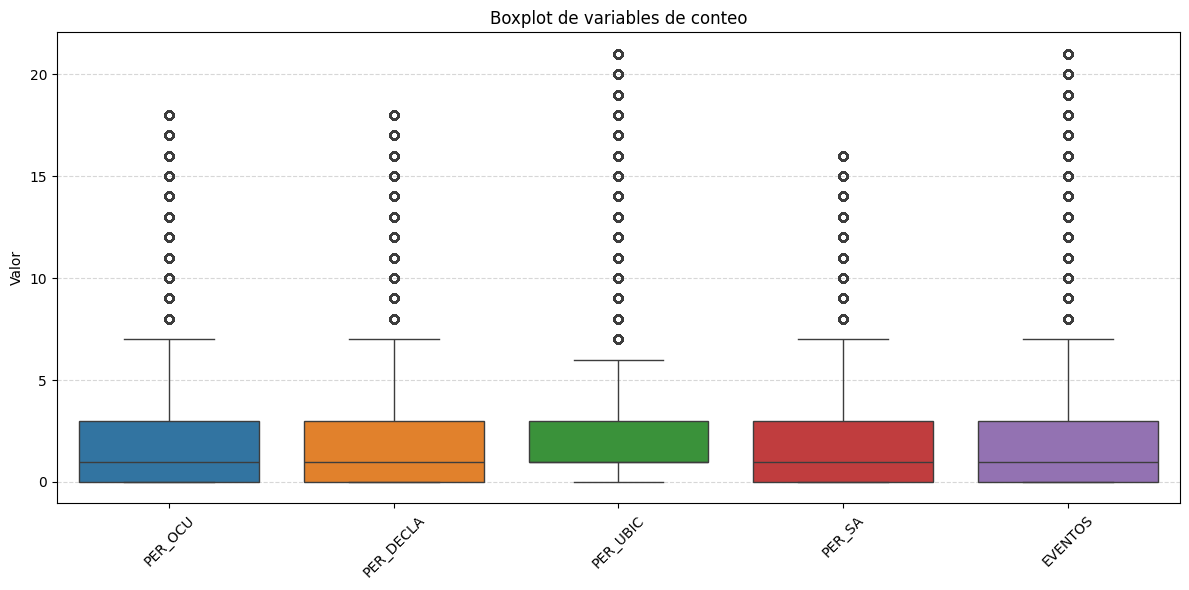

In [104]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[variables_conteo])
plt.title("Boxplot de variables de conteo")
plt.ylabel("Valor")
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [106]:
# Crear un diccionario para almacenar resultados
resumen_conteo = {}

for col in variables_conteo:
    # Frecuencia de cada valor
    vc = df[col].value_counts().sort_index()
    
    # Total de la variable
    total = df[col].sum()
    
    # Guardar ambos en el diccionario
    resumen_conteo[col] = {
        "Frecuencia de valores": vc,
        "Suma total": total
    }

# Mostrar resumen organizado
for col, info in resumen_conteo.items():
    print(f"\n🔢 Variable: {col}")
    print("-" * 40)
    print("📊 Value Counts:")
    print(info["Frecuencia de valores"])
    print(f"\n🧮 Suma total: {info['Suma total']}")


🔢 Variable: PER_OCU
----------------------------------------
📊 Value Counts:
PER_OCU
0     489997
1     629969
2     238812
3     132846
4      88724
5      66370
6      50497
7      39307
8      33141
9      27574
10     22582
11     19811
12     17611
13     15000
14     13249
15     11090
16      9772
17      7860
18      6032
Name: count, dtype: int64

🧮 Suma total: 4884759

🔢 Variable: PER_DECLA
----------------------------------------
📊 Value Counts:
PER_DECLA
0     542853
1     605541
2     233352
3     131047
4      87532
5      64333
6      51771
7      38324
8      32329
9      25698
10     21878
11     19627
12     16525
13     13308
14     10810
15      8656
16      6932
17      5542
18      4186
Name: count, dtype: int64

🧮 Suma total: 4573622

🔢 Variable: PER_UBIC
----------------------------------------
📊 Value Counts:
PER_UBIC
0     455016
1     660205
2     248504
3     140713
4      94271
5      68887
6      51418
7      41642
8      32975
9      27009
10     22399
1

In [14]:
# Paso 2: Agrupar y sumar valores de conteo
df = df.groupby(columnas_grupo, as_index=False)[variables_conteo].sum()

In [15]:
# Paso 4: Validar que no queden NaN
print("¿Quedan NaN después del reemplazo?")
print(df[variables_conteo].isna().sum())

¿Quedan NaN después del reemplazo?
PER_OCU      0
PER_DECLA    0
PER_UBIC     0
PER_SA       0
EVENTOS      0
dtype: int64


# Generacion de COD_RPT de victimas
En esta seccion se genera el COD_RPT de las victimas para su posterior uso en la generacion de las primary keys.

In [16]:
# Asegurarse de que el índice sea limpio, secuencial y comience desde 0
df = df.reset_index(drop=True)

# Crear columna 'COD_RPT' como ID incremental comenzando desde 1
df['COD_RPT'] = df.index + 1

# Reordenar columnas para que 'COD_RPT' esté al inicio
df = df[['COD_RPT'] + [col for col in df.columns if col != 'COD_RPT']]


# Muestra del dataset de víctimas limpio 

In [18]:
df.head(20)

,COD_RPT,COD_ESTADO_DEPTO,ESTADO_DEPTO,PARAM_HECHO,HECHO,SEXO,ETNIA,DISCAPACIDAD,CICLO_VITAL,PER_OCU,PER_DECLA,PER_UBIC,PER_SA,EVENTOS
0,1,0,SIN DEFINIR,1,Acto terrorista / Atentados / Combates / Enfre...,Hombre,Gitano (RROM) (Acreditado RA),Ninguna,entre 18 y 28,0,22,0,0,0
1,2,0,SIN DEFINIR,1,Acto terrorista / Atentados / Combates / Enfre...,Hombre,Gitano (RROM) (Acreditado RA),Ninguna,entre 29 y 59,0,0,7,7,0
2,3,0,SIN DEFINIR,1,Acto terrorista / Atentados / Combates / Enfre...,Hombre,Gitano (RROM) (Acreditado RA),Ninguna,entre 29 y 60,0,0,8,8,0
3,4,0,SIN DEFINIR,1,Acto terrorista / Atentados / Combates / Enfre...,Hombre,Gitano(a) ROM,Fisica,entre 29 y 59,0,7,14,14,0
4,5,0,SIN DEFINIR,1,Acto terrorista / Atentados / Combates / Enfre...,Hombre,Gitano(a) ROM,Fisica,entre 29 y 60,0,34,11,11,0
5,6,0,SIN DEFINIR,1,Acto terrorista / Atentados / Combates / Enfre...,Hombre,Gitano(a) ROM,Ninguna,entre 18 y 28,0,0,8,8,0
6,7,0,SIN DEFINIR,1,Acto terrorista / Atentados / Combates / Enfre...,Hombre,Gitano(a) ROM,Ninguna,entre 29 y 59,0,21,7,0,0
7,8,0,SIN DEFINIR,1,Acto terrorista / Atentados / Combates / Enfre...,Hombre,Gitano(a) ROM,Ninguna,entre 29 y 60,0,102,34,2,0
8,9,0,SIN DEFINIR,1,Acto terrorista / Atentados / Combates / Enfre...,Hombre,Indigena,Auditiva,entre 29 y 59,0,14,0,0,0
9,10,0,SIN DEFINIR,1,Acto terrorista / Atentados / Combates / Enfre...,Hombre,Indigena,Auditiva,entre 29 y 60,0,44,0,0,0


In [19]:
df.tail(20)

,COD_RPT,COD_ESTADO_DEPTO,ESTADO_DEPTO,PARAM_HECHO,HECHO,SEXO,ETNIA,DISCAPACIDAD,CICLO_VITAL,PER_OCU,PER_DECLA,PER_UBIC,PER_SA,EVENTOS
79556,79557,99,Vichada,14,Lesiones Personales Psicologicas,Mujer,Ninguna,Por Establecer,entre 29 y 60,54,0,0,0,54
79557,79558,99,Vichada,15,Confinamiento,Hombre,Indigena,Ninguna,entre 12 y 17,0,0,38,38,0
79558,79559,99,Vichada,15,Confinamiento,Hombre,Negro(a) o Afrocolombiano(a),Multiple,entre 18 y 28,0,0,2,2,0
79559,79560,99,Vichada,15,Confinamiento,Hombre,Negro(a) o Afrocolombiano(a),Ninguna,entre 12 y 17,0,0,7,7,0
79560,79561,99,Vichada,15,Confinamiento,Hombre,Ninguna,Ninguna,entre 12 y 17,0,0,13,13,0
79561,79562,99,Vichada,15,Confinamiento,Hombre,Ninguna,Ninguna,entre 18 y 28,0,0,5,5,0
79562,79563,99,Vichada,15,Confinamiento,Hombre,Ninguna,Ninguna,entre 29 y 59,0,0,6,6,0
79563,79564,99,Vichada,15,Confinamiento,Hombre,Ninguna,Ninguna,entre 29 y 60,0,0,21,21,0
79564,79565,99,Vichada,15,Confinamiento,Hombre,Raizal del Archipielago de San Andres y Provid...,Ninguna,entre 18 y 28,0,0,24,24,0
79565,79566,99,Vichada,15,Confinamiento,Hombre,Raizal del Archipielago de San Andres y Provid...,Ninguna,entre 29 y 60,0,0,5,5,0


In [111]:
# Crear un diccionario para almacenar resultados
resumen_conteo = {}

for col in variables_conteo:
    # Frecuencia de cada valor
    vc = df[col].value_counts().sort_index()
    
    # Total de la variable
    total = df[col].sum()
    
    # Guardar ambos en el diccionario
    resumen_conteo[col] = {
        "Frecuencia de valores": vc,
        "Suma total": total
    }

# Mostrar resumen organizado
for col, info in resumen_conteo.items():
    print(f"\n🔢 Variable: {col}")
    print("-" * 40)
    print("📊 Value Counts:")
    print(info["Frecuencia de valores"])
    print(f"\n🧮 Suma total: {info['Suma total']}")



🔢 Variable: PER_OCU
----------------------------------------
📊 Value Counts:
PER_OCU
0      21630
1        874
2        532
3        680
4       1124
       ...  
700        1
708        1
720        1
727        1
730        1
Name: count, Length: 668, dtype: int64

🧮 Suma total: 4884759

🔢 Variable: PER_DECLA
----------------------------------------
📊 Value Counts:
PER_DECLA
0      23624
1        863
2        485
3        670
4       1057
       ...  
697        1
700        1
701        1
723        2
732        1
Name: count, Length: 654, dtype: int64

🧮 Suma total: 4573622

🔢 Variable: PER_UBIC
----------------------------------------
📊 Value Counts:
PER_UBIC
0      14461
1       1686
2       1077
3       1277
4       1551
       ...  
714        1
715        1
732        1
743        1
770        1
Name: count, Length: 639, dtype: int64

🧮 Suma total: 4657671

🔢 Variable: PER_SA
----------------------------------------
📊 Value Counts:
PER_SA
0      16606
1       1757
2       145

# Exportamos los datos limpios a un archivo CSV
Se exporta el archivo CSV con los datos limpios en en ´/data/processed/victimas_por_hechos_departamental_20250416.csv´ para su posterior análisis

In [112]:
df.to_csv(
    path_or_buf='../data/processed/victimas_por_hechos_departamental_20250416.csv',
    sep=',',
    na_rep='',
    header=True,
    index=False,
    encoding='utf-8',
    quoting=csv.QUOTE_MINIMAL,
    lineterminator=os.linesep,
    quotechar='"',
    decimal='.',
    errors='strict'
)